# Project 3 House Prices 

In this project we are going to predict house prices using real dataset with 2930 observations and 82 variables

The goal is to go through all the main steps of a data science project i.e. preparing the data,EDA and modeling to predict the SalePrice.

## A quick look at the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

/Users/margaretakoren/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train = pd.read_csv("house-prices.csv")

In [3]:
df_train.shape

(2430, 82)

In [4]:
df_train.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
#We are going to see first few records in the dataset
df_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [6]:
df_train.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2430.000000,2.430000e+03,2430.000000,2010.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2410.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,1469.478189,7.149375e+08,57.092593,69.201990,10243.557613,6.088889,5.569959,1971.167490,1984.238683,101.995436,...,93.917695,47.091770,22.294650,2.471605,16.529218,2.401235,56.179835,6.209465,2007.783539,180199.692593
std,843.236520,1.887339e+08,42.903254,23.486988,8353.925254,1.414621,1.116442,30.207931,20.751163,176.611699,...,128.106940,67.123846,62.386414,24.880245,56.822227,36.111988,616.661541,2.721942,1.311843,79607.467171
min,1.000000,5.263011e+08,20.000000,21.000000,1470.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,749.250000,5.284770e+08,20.000000,58.000000,7482.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,1470.500000,5.354541e+08,50.000000,68.000000,9500.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2193.500000,9.071352e+08,70.000000,80.000000,11604.500000,7.000000,6.000000,2000.000000,2003.000000,164.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213099.750000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


We can see that the names are written with white spaces in most of the columns. For easier use of the column names, we will reduce them to a form such as the column name "SalePrice". That is, we will write names without white spaces.

In [7]:
df_train.columns = df_train.columns.str.replace(' ','')

## Preprocessing

In [8]:
def preprocess(df):
    # Work on a copy
    df = df.copy()
    
    #for now we are going to keep PID column because it helps us use some simple count calculations
    df = df.drop(columns=['Order'], axis=1)

   
    #Incorrect values
    ##years of construction of the garage can be in the interval up to 2010
    df = df.replace({"GarageYrBlt" : 2207},{"GarageYrBlt" : 2007})
    #df = df.drop(df[df["GarageYrBlt"] > 2010].index)
    ##values above 700000 in SalePrice
    df = df.drop(df[(df['PID'] == 528320050) | (df['PID'] == 528351010)].index, axis=0)
    ##We are going to remove houses that are bigger than 4000 sq feet
    #df = df.drop(df[df.GrLivArea >= 4000].index, axis=0)

    
    # Handling missing values
    ##Filling out columns LotFrontage with median and MasVnrArea with mean
    ###df['LotFrontage'] = df['LotFrontage'].fillna(abs(df['LotFrontage'].median()))
    ###df['MasVnrArea'] = df['MasVnrArea'].fillna(abs(df['MasVnrArea'].mean()))
    ##Using YearBuilt to address missing values in GarageYrBlt    
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
    ##If they have value NaN than we will fill them with 0 assuming they don't exist
    null = ['BsmtUnfSF','BsmtFullBath', 'BsmtHalfBath','BsmtFinSF1', 'BsmtFinSF2','GarageArea', 
            'GarageCars', 'TotalBsmtSF']
    nan = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType','GarageFinish',
           'GarageQual','GarageCond', 'BsmtQual' , 'BsmtCond' , 'BsmtExposure' ,'BsmtFinType1' , 'BsmtFinType2']
    df[null]=df[null].fillna(0)
    df[nan]=df[nan].fillna("nan")
    df["Electrical"] = df.Electrical.mode()[0]
    df["MasVnrType"]=df["MasVnrType"].fillna("None")
    
    
    #Feature engineering
    ##Now we are going to calculate total sqeer feet 
    df["TotalSF"]= df.TotalBsmtSF + df.GrLivArea
    df["TotalSF"]=df["1stFlrSF"] + df["2ndFlrSF"]
    df["TotalPorchSF"] = df.OpenPorchSF + df.EnclosedPorch + df["3SsnPorch"] + df["ScreenPorch"]
    ##Total room count
    df['TotalRooms'] = (df['TotRmsAbvGrd'] + df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath'])
    ##Total Bathrooms
    df["TotalBathrooms"] = df.FullBath + .5*df.HalfBath + df.BsmtFullBath + .5*df.BsmtHalfBath
    ##Conversion from numerical to categorical features
    df["MSSubClass"] = df.MSSubClass.apply(lambda x: str(x))
    df["MoSold"] = df.MoSold.apply(lambda x: str(x))
    df["YrSold"] = df.YrSold.apply(lambda x: str(x))
    df["BedroomAbvGr"] = df.BedroomAbvGr.apply(lambda x: str(x))
    df["KitchenAbvGr"] = df.KitchenAbvGr.apply(lambda x: str(x))
    df["TotRmsAbvGrd"] = df.TotRmsAbvGrd.apply(lambda x: str(x))
    df["Fireplaces"] = df.Fireplaces.apply(lambda x: str(x))
    df["GarageCars"] = df.GarageCars.apply(lambda x: str(x))
    ## Now let's create some boolean features (Yes/No)   
    df["HasBasement"]= df.TotalBsmtSF.apply(lambda x: 1 if x>0 else 0)
    df["HasGarage"]= df.GarageArea.apply(lambda x: 1 if x>0 else 0)
    df["HasPorch"] = df.TotalPorchSF.apply(lambda x: 1 if x>0 else 0 )
    df["HasPool"] = df.PoolArea.apply(lambda x: 1 if x>0 else 0 )
    df["IsNew"] = (df.YearBuilt > 2000).astype(np.int64)
    df["WasCompleted"]= (df.SaleCondition != "Partial").astype(np.int64)
    

    #Feature encoding
    
    df.Alley.replace({"Grvl": 1, "Pave": 2}, inplace=True)
    df.LotShape.replace({'Reg':1,'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
    df.LandContour.replace({'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1}, inplace=True)
    df.Utilities.replace({'ELO':1,'NoSeWa': 2, 'NoSewr':3, 'AllPub':4}, inplace=True)
    df.LandSlope.replace({'Gtl':3, 'Mod':2, 'Sev':1}, inplace=True)
    df.ExterQual.replace({'Po':1, 'Gd':4, 'TA':3, 'Fa':2, 'Ex':5}, inplace=True)
    df.ExterCond.replace({'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1}, inplace=True)
    df.BsmtQual.replace({'Gd':4, 'TA':3, 'Ex':5,'Fa':2, 'Po':1}, inplace=True)
    df.BsmtCond.replace({'TA':3, 'Gd':4, 'Fa':2,'Ex':5, 'Po':1}, inplace=True)
    df.BsmtExposure.replace({'No':1, 'Av':3, 'Mn':2, 'Gd':4}, inplace=True)
    df.BsmtFinType1.replace({'GLQ':6, 'Unf':1, 'Rec':3, 'LwQ':2, 'BLQ':4, 'ALQ':5}, inplace=True)
    df.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'BLQ':4,'Rec':3, 'ALQ':5, 'GLQ':6}, inplace=True)
    df.HeatingQC.replace({'Ex':5, 'TA':3, 'Fa':2, 'Gd':4, 'Po':1}, inplace=True)
    df.KitchenQual.replace({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1}, inplace=True)
    df.Functional.replace({'Typ':8, 'Mod':5, 'Maj1':4, 'Min2':6, 'Min1':7, 'Maj2':3, 'Sal':1, 'Sev':2}, inplace=True)
    df.FireplaceQu.replace({'TA':3, 'Gd':4,'Fa':2, 'Po':1, 'Ex':5}, inplace=True)
    df.GarageFinish.replace({'Fin':3, 'Unf':1, 'RFn':2}, inplace=True)
    df.GarageQual.replace({'TA':3, 'Fa':2,'Gd':4, 'Ex':5, 'Po':1}, inplace=True)
    df.GarageCond.replace({'TA':3,'Fa':2, 'Gd':4, 'Ex':5, 'Po':1}, inplace=True)
    df.PavedDrive.replace({'Y':3, 'N':1, 'P':2}, inplace=True)
    df.PoolQC.replace({'Ex':5, 'TA':3, 'Fa':2, 'Gd':4, 'Po':1}, inplace=True)


    
    return df

preprocessed_df = preprocess(df_train)
preprocessed_df.head()

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalSF,TotalPorchSF,TotalRooms,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,IsNew,WasCompleted
0,528275070,60,RL,NaN,8795,Pave,nan,2,4,4,...,2256,54,11.0,2.5,1,1,1,0,0,1
1,535305120,20,RL,75.0,10170,Pave,nan,1,4,4,...,1575,0,7.0,1.5,1,1,0,0,0,1
2,923228250,160,RM,21.0,2001,Pave,nan,1,4,4,...,1092,0,8.0,1.5,1,1,0,0,0,1
3,535152150,20,RL,70.0,10552,Pave,nan,2,4,4,...,1700,38,9.0,2.0,1,1,1,0,0,1
4,903475060,190,RM,60.0,10120,Pave,nan,2,3,4,...,1889,264,11.0,1.5,1,1,1,0,0,1


In [9]:
preprocessed_df.shape

(2428, 91)

In [10]:
preprocessed_df.isnull().sum().sum()

440

## Data cleaning

In [11]:
print('Train set duplicate PID: {}'.format(df_train.duplicated("PID").sum()))

Train set duplicate PID: 0


The Order and PID variables are identifiers. They are not useful to predict house prices, so we are going to remove them.

### Finding incorrect values

We can see that there are some irregularities in the statistical description of the train_data. The years of construction of the garage can be in the interval up to 2010.

In [12]:
df_train[["GarageYrBlt", "YearBuilt", "YrSold"]].describe()

,GarageYrBlt,YearBuilt,YrSold
count,2292.000000,2430.000000,2430.000000
mean,1977.861257,1971.167490,2007.783539
std,25.544869,30.207931,1.311843
min,1896.000000,1875.000000,2006.000000
25%,1960.000000,1954.000000,2007.000000
50%,1978.000000,1973.000000,2008.000000
75%,2002.000000,2000.000000,2009.000000
max,2207.000000,2010.000000,2010.000000


We are going to see how our target variable is distributed. For that we can use the Seaborn library in which we have a module called displot which will give the distribution of a
variable and here we will pass our SalePrice column

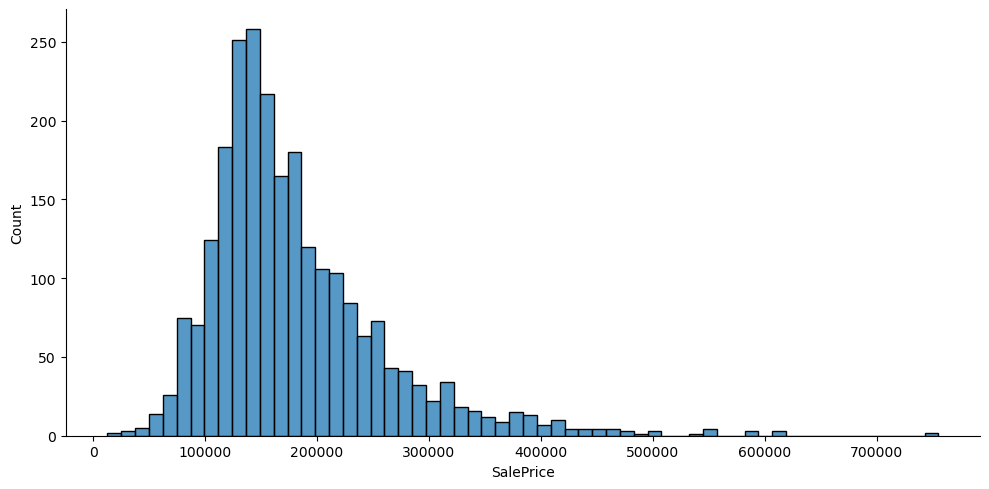

In [13]:
sns.displot(df_train["SalePrice"], aspect=2,)
plt.show()

Now we see that the value above 700000 deviates too much from the rest of the listed values so we are going to handle that 

In [14]:
df_train.loc[df_train['SalePrice'] > 700000]

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
102,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
237,1768,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [15]:
df_train.loc[(df_train['PID'] == 528320050) | (df_train['PID'] == 528351010)]

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
102,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
237,1768,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


We can see that the distribution of the SalePrice is not normal. We have a long tail in the right so it's a right skewed and this means that majority of our data has a lower priced house and we have a very limited number of records for the high price house. This is a problem in general and in the next step we will try to fix this distribution issue by taking a log of the SalePrice.

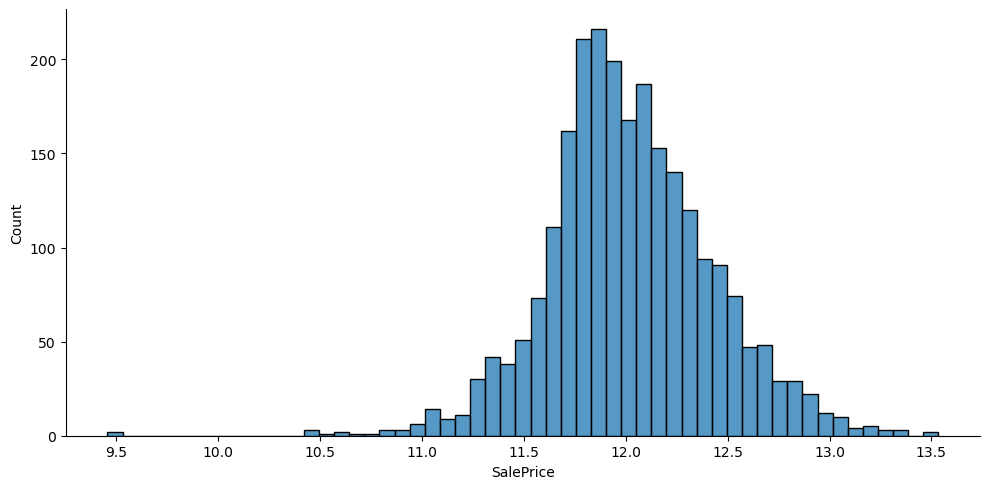

In [16]:
target = np.log(df_train["SalePrice"])
sns.displot(target, aspect=2)
plt.show()

Our variable now seems more normally distributed then it was before applying the logarithmic scale

In [17]:
# We will add a LogSalePrice variable to the df
preprocessed_df['LogSalePrice'] = np.log10(preprocessed_df['SalePrice']) 

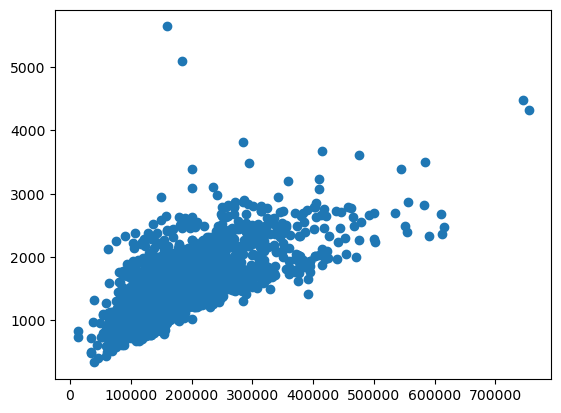

In [18]:
# Find outliers:
plt.Figure(figsize=(8,8))
plt.scatter(df_train['SalePrice'], df_train['GrLivArea'] );

We are going to remove houses that are bigger than 4000 sq feet

### Missing values

Fristly, let's see how many missing values are there

In [19]:
#Missing values counts in each column
missing_count = (df_train.isnull().sum() / len(df_train))*100
#Fillter to fing missing count > 0 
missing_count = missing_count[missing_count > 0]
print(missing_count.sort_values())

Electrical       0.041152
GarageArea       0.041152
TotalBsmtSF      0.041152
BsmtUnfSF        0.041152
BsmtFinSF1       0.041152
BsmtFinSF2       0.041152
GarageCars       0.041152
BsmtFullBath     0.082305
BsmtHalfBath     0.082305
MasVnrArea       0.823045
MasVnrType       0.823045
BsmtFinType1     2.921811
BsmtQual         2.921811
BsmtCond         2.921811
BsmtFinType2     2.962963
BsmtExposure     3.045267
GarageType       5.596708
GarageFinish     5.679012
GarageQual       5.679012
GarageCond       5.679012
GarageYrBlt      5.679012
LotFrontage     17.283951
FireplaceQu     48.806584
Fence           79.876543
Alley           93.292181
MiscFeature     96.296296
PoolQC          99.506173
dtype: float64


### Handling missing values

In [20]:
##Filling out columns LotFrontage with median and MasVnrArea with mean
preprocessed_df['LotFrontage'] = preprocessed_df['LotFrontage'].fillna(abs(preprocessed_df['LotFrontage'].median()))
preprocessed_df['MasVnrArea'] = preprocessed_df['MasVnrArea'].fillna(abs(preprocessed_df['MasVnrArea'].mean()))

In [21]:
preprocessed_df[['MasVnrArea','LotFrontage']].isnull().sum()

MasVnrArea     0
LotFrontage    0
dtype: int64

We are going to use YearBuilt to address missing values in GarageYrBlt

In [22]:
df_train[['YearBuilt', 'GarageYrBlt']].isnull().sum()

YearBuilt        0
GarageYrBlt    138
dtype: int64

In [23]:
def nan(df): 
    return df[df.isnull().any(axis=1)]
nan(df_train)

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,764,904301070,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2426,836,907126010,20,RL,82.0,12464,Pave,NaN,IR2,Low,...,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal,152000
2427,1654,527353080,60,RL,80.0,11584,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,197000
2428,2608,535402070,80,RL,85.0,13400,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,6,2006,WD,Normal,159950


In [24]:
#pd.set_option('display.max_rows', None)
df_train[['YearBuilt','GarageYrBlt']][df_train['GarageYrBlt'].isna()]

,YearBuilt,GarageYrBlt
16,1975,NaN
48,1900,NaN
62,1959,NaN
73,1875,NaN
76,1974,NaN
...,...,...
2292,1965,NaN
2308,1945,NaN
2314,1940,NaN
2354,1971,NaN


In [25]:
preprocessed_df[['YearBuilt','GarageYrBlt']]

,YearBuilt,GarageYrBlt
0,2000,2000.0
1,1951,1951.0
2,1970,1970.0
3,1959,1959.0
4,1910,1960.0
...,...,...
2425,1987,1987.0
2426,1996,2000.0
2427,1979,1979.0
2428,1966,1966.0


## Feature encoding

In [26]:
#Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])
#Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])
#Let's print how many numerical and categorical features do we have 
print('There are {0} numerical features and {1} categorical features in the training data'.\
      format(numeric_data.shape[1], categorical_data.shape[1]))

There are 39 numerical features and 43 categorical features in the training data


Eventually we will have to make sure that we based on the importance of course, we convert these 43 categorical features into numerical features

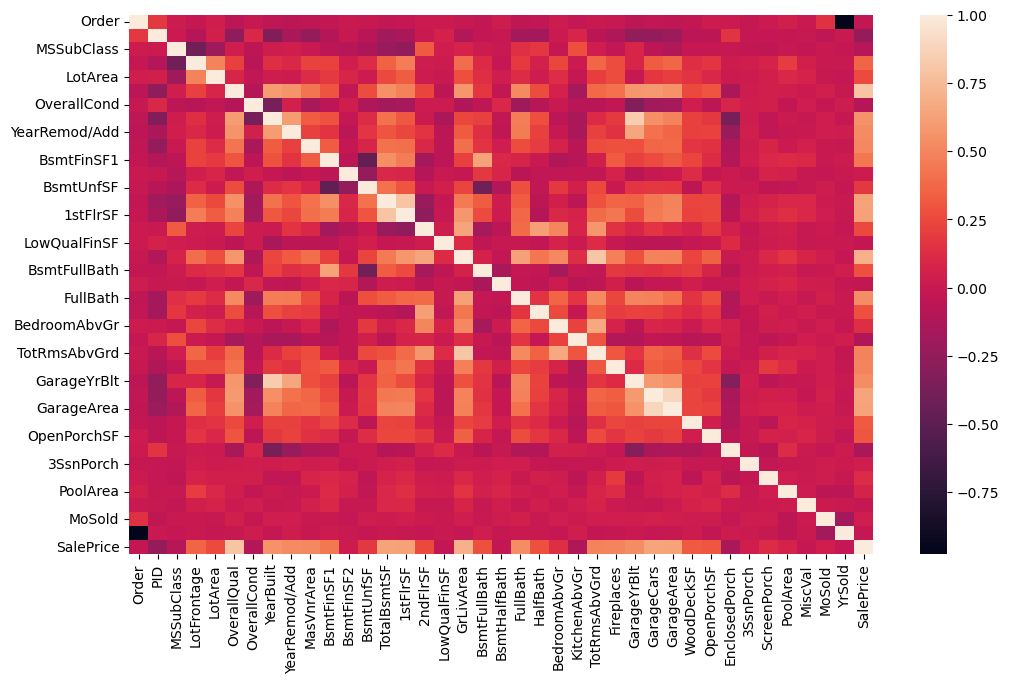

In [27]:
#Corellation plot for the numerical features 
corr = numeric_data.corr()
#Plot the corellation matrix
plt.subplots(figsize=(12,7))
sns.heatmap(corr)
plt.show()

In this graph we are interested in either the lower triangle or the upper. Lighter color means more correlation. This diagonal line which is white color says about the correlation among itself.

Next we are going to do correlation analysis for the categorical data

But before we can start implementing this method on categorical data we have to conduct few other activities on the data. For example, we have a lot of missing values which we need to remove and we will also see there are many other data which looks numerical but they are categorical in nature so we will convert them to categorical first.

So we have heard many times that the as the property goes older the price actually goes down now is it really a fact or is there actually a trend in that let's first look into that question

We are going to group train data set based on the year and months when was property sold.

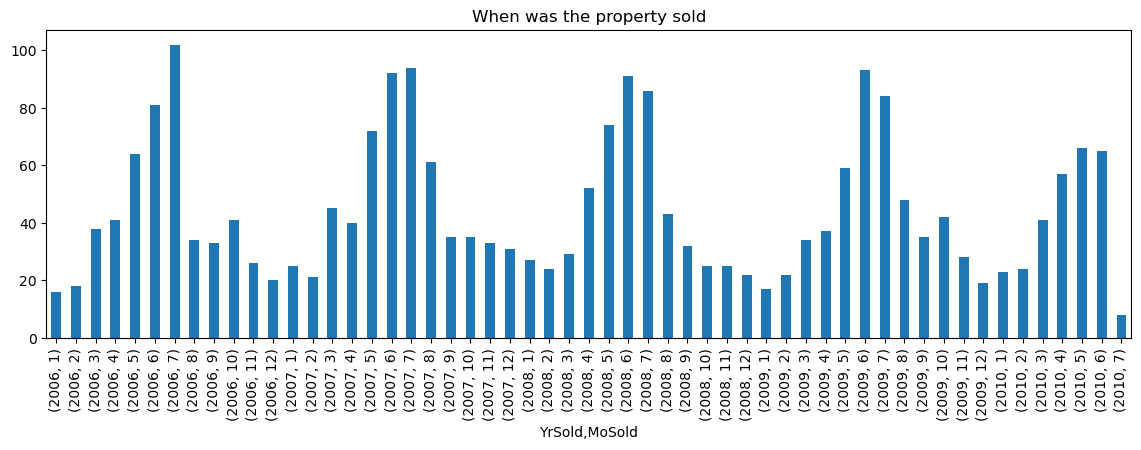

In [28]:
#When was the propery sold in which year and month 
df_train.groupby(["YrSold", "MoSold"]).PID.count().plot(kind="bar", figsize=(14,4))
plt.title("When was the property sold")
plt.show()

We see a interesting trend here. So we notice around June and July of every year the SalePrice or the number of property which is sold, goes up mostly around June and July. Quite an interesting pattern which we will explore later on.

So the next thing that is very common while purchasing a properties is to find out where exactly the property is located

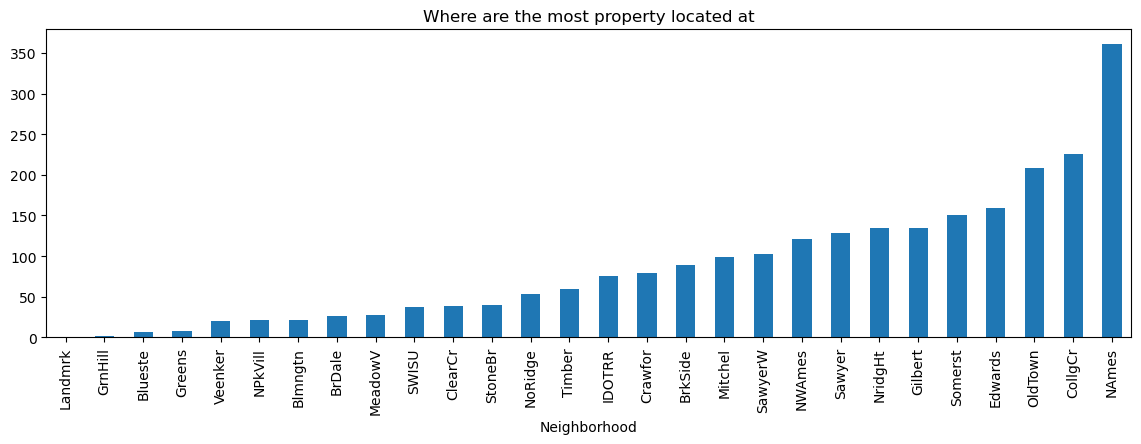

In [29]:
df_train.groupby(["Neighborhood"]).PID.count().sort_values().plot(kind="bar", figsize=(14,4))
plt.title("Where are the most property located at")
plt.show()

It shows that around the North Ames area and the College Creek area are located majority of the properties.

Next thing that we would like to see is how are numerical and categorical features distributed. First let's focus on the numerical features. We are going to do that by using a melt method through which I can actually plot each and every features and also their distribution. Now let's also see whether that distribution plot is also able to tell us some additional information

### Categorical features

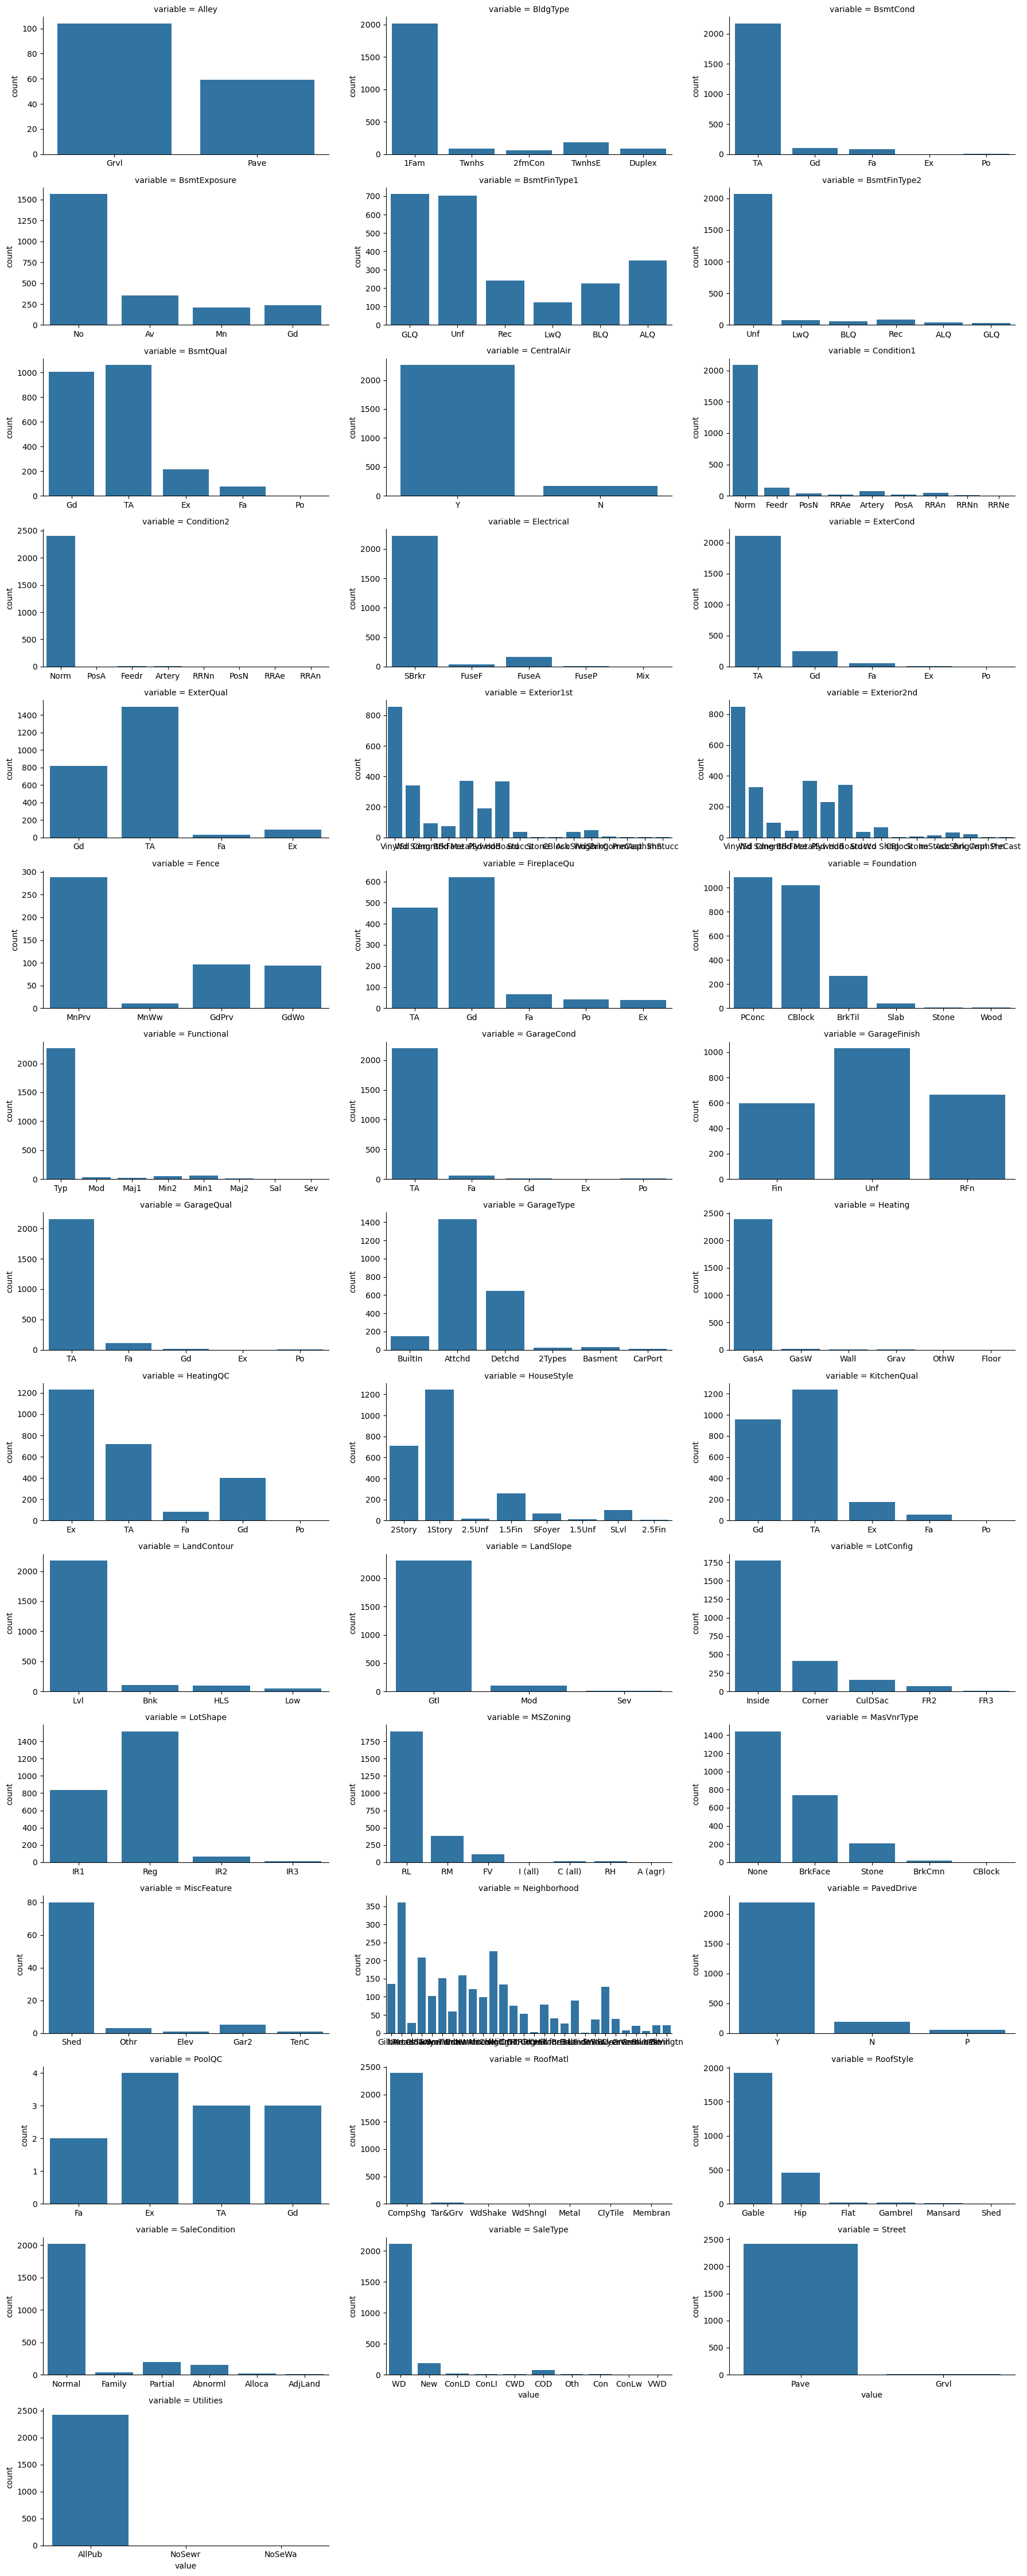

In [30]:
#Let's plot the count of categorical features
f = pd.melt(df_train, value_vars = sorted(categorical_data))
g = sns.FacetGrid(f, col="variable", col_wrap = 3, sharex=False, sharey=False, aspect= 2)
g = g.map(sns.countplot, "value")
g.fig.tight_layout()
plt.show()

In [31]:
#Number of null values in each feature
null_counts = categorical_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MSZoning            0
Street              0
Alley            2267
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         20
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           71
BsmtCond           71
BsmtExposure       74
BsmtFinType1       71
BsmtFinType2       72
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu      1186
GarageType        136
GarageFinish      138
GarageQual        138
GarageCond        138
PavedDrive          0
PoolQC           2418
Fence            1941
MiscFeature      2340
SaleType            0
SaleCondition       0
dtype: int64


### Numerical features

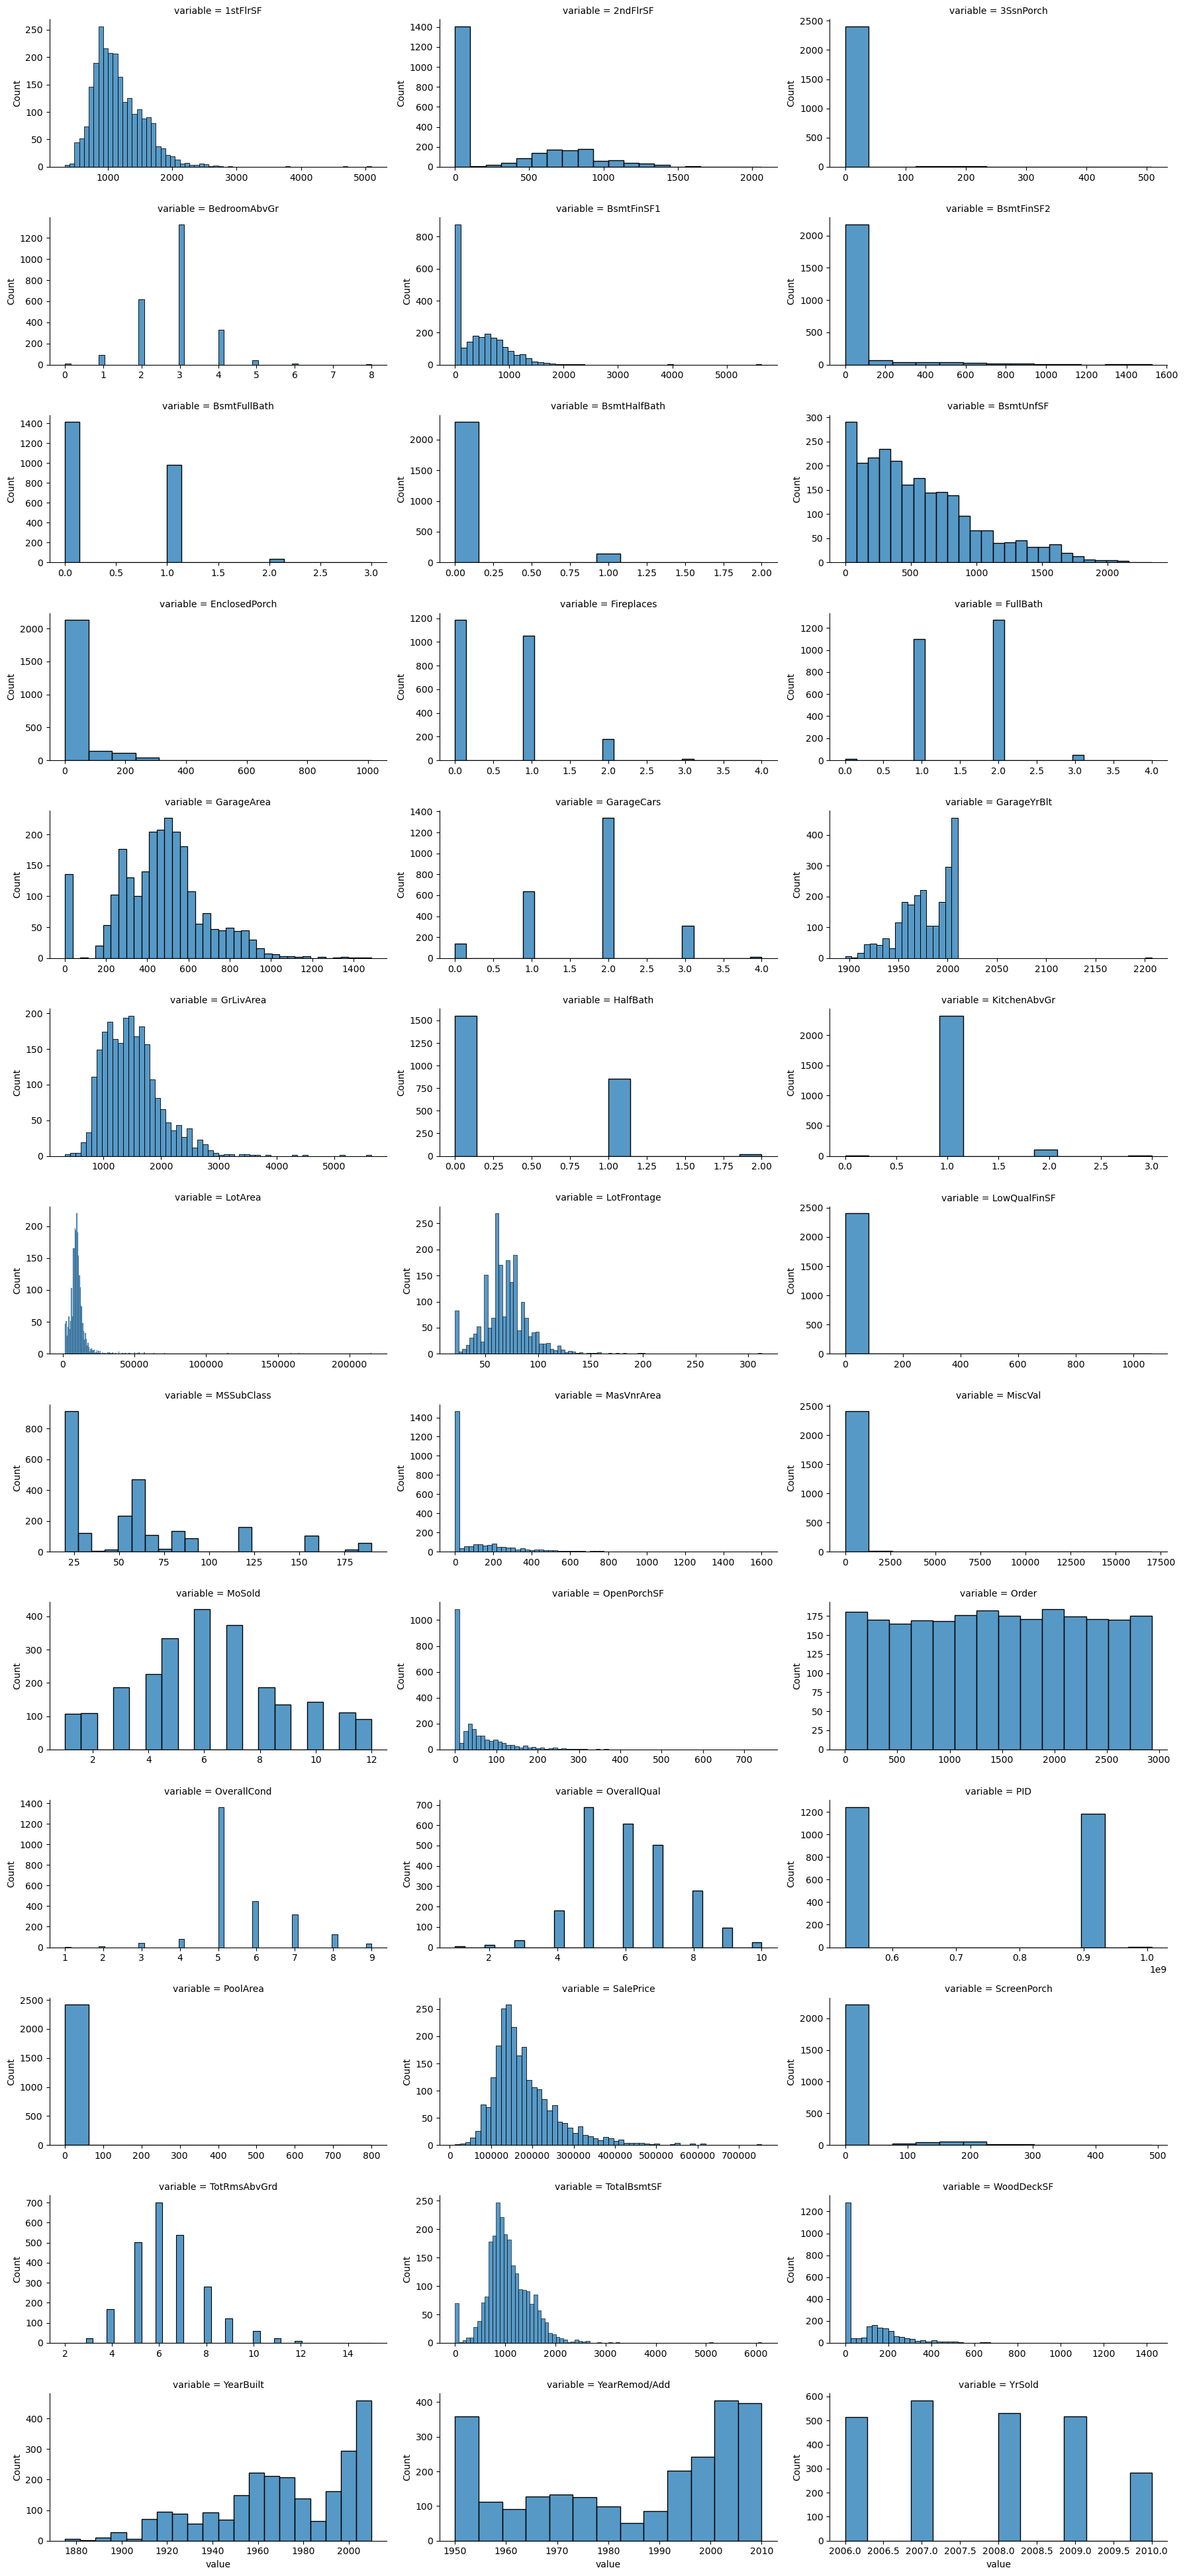

In [32]:
#Distribution of numerical features 
f = pd.melt(df_train, value_vars = sorted(numeric_data))
g = sns.FacetGrid(f, col="variable", col_wrap = 3,sharex=False, sharey=False,aspect= 2)
g = g.map(sns.histplot, "value")
g.fig.tight_layout()
plt.show()

So we can see that this distributions are meant to be continuous and some of them are not.
So even though they are numerical feature, they are not continuous value and that means they are categorical values.
These are the few columns we will try to convert from numerical to categorical.

## One-hot encoding

One hot encoding is a technique that we are going to use for representing categorical variables as numerical values in a machine learning model.
The idea is to create a new variable for each possible value.
It’s called one-hot encoding because only one variable from the rest can be positive at a time and these indicators are called dummy variables.

In [33]:
#Categorical variables that have possibility of ordering
categorical_nominal  = ['MSSubClass','MSZoning','Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
                      'Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle', 'RoofMatl','Exterior1st',
                      'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature',
                       'SaleType','SaleCondition','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                        'Electrical','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','FireplaceQu',
                        'GarageFinish','GarageCars','GarageQual','GarageCond','PoolQC','Fence','MoSold','YrSold' ]

In [34]:
df_encoded = pd.get_dummies(preprocessed_df, columns = categorical_nominal)

## Splitting data

In [35]:
df_encoded.shape

(2428, 355)

In [36]:
# Split into train/test sets

train_df, test_df = train_test_split(df_encoded, train_size=0.5, test_size=0.5, random_state=0)

print('Train DataFrame:', train_df.shape)
print('Test DataFrame:', test_df.shape)

Train DataFrame: (1214, 355)
Test DataFrame: (1214, 355)


## Model fitting

__Mean absolute error__

Absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation. MAE takes the average of absolute errors for a group of predictions and observations as a measurement of the magnitude of errors for the entire group.

$MAE=\frac{1}{N}\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|$

In [37]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

__Root mean squared error__ 

Root mean squared error calculates the transformation between values predicted by a model and actual values. 

$RMSE=\sqrt{\frac{\sum_{i=1}^{n}\left||y_{i}-\hat{y}_{i}\right||^2}{N}}$

In [38]:
# Root mean squared error
def RMSE(y, y_pred):
    mse = np.mean(np.square(y - y_pred)) 
    return np.sqrt(mse) 

In [39]:
# Function to create variables
def create_variables(features, target):
    X_tr, y_tr, X_te, y_te = None, None, None, None 
    X_tr = train_df[features].values
    y_tr = train_df[target].values
    X_te = test_df[features].values 
    y_te = test_df[target].values
    print('X_tr shape:', X_tr.shape, '\ny_tr shape:', y_tr.shape,'\nX_te shape:', X_te.shape, '\ny_te shape:', y_te.shape, "\n")
    return X_tr, y_tr, X_te, y_te

Here we are going to fit liinear regression for simple model

In [40]:
# Function to fit a linear regression
from sklearn.linear_model import LinearRegression, HuberRegressor

def fit_lr(X_train, y_train, X_test):

    # Create a linear regression
    lr = LinearRegression()
    
    # Fit it to train data
    lr.fit(X_train, y_train)
    
    # Compute predictions for test set
    y_pred = lr.predict(X_test)
    
    return y_pred, lr


Here we are going to fit Ridge regression for intermediate and complex model

In [41]:
# Function to fit Ridge regression
from sklearn.linear_model import Ridge
def fit_ridge(X_train, y_train, X_test):
    ridge = Ridge(alpha=1) 
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    return y_pred, ridge

### Computing baseline

In [42]:
# Create X/y variables
features = ['OverallQual','GrLivArea',]
X_tr, y_tr, X_te, y_te = create_variables(features, 'LogSalePrice')

# Median baseline
rmse_baseline = RMSE(y_te, np.median(y_tr))
mae_baseline = MAE(10**y_te, np.median(10**y_tr))

print('RMSE baseline: {:.3f}'.format(rmse_baseline))
print('MAE baseline: {:,.2f}$'.format(mae_baseline))

X_tr shape: (1214, 2) 
y_tr shape: (1214,) 
X_te shape: (1214, 2) 
y_te shape: (1214,) 

RMSE baseline: 0.185
MAE baseline: 57,177.08$


### "Simple" model with two variables 

In [43]:

# Select features
features = ['OverallQual','GrLivArea',]

# Create X/y variables
X_tr, y_tr, X_te, y_te = create_variables(features, 'LogSalePrice')

# Linear regression
y_pred, lr_simple1 = fit_lr(X_tr, y_tr, X_te)
rmse_lr = RMSE(y_te, y_pred)
mae_lr = MAE(10**y_te, 10**y_pred)
print('RMSE linear regression: {:.3f}'.format(rmse_lr))
print('MAE linear regression: {:,.2f}$'.format(mae_lr), "\n")


X_tr shape: (1214, 2) 
y_tr shape: (1214,) 
X_te shape: (1214, 2) 
y_te shape: (1214,) 

RMSE linear regression: 0.093
MAE linear regression: 26,165.34$ 



We already saw that the SalePrices have a right-skewed distribution which can make the model biased toward expensive houses. One of the simplest ways to handle this problem is to apply a log.

In this code, both y_tr and y_pred are prices in dollars. 

Finally, let’s compute the MAE score of our simple two-features model.

On average, our predictions are around 25 thousand dollars away from the observed price.

In [44]:
df_encoded.columns

Index(['PID', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add',
       ...
       'MoSold_5', 'MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9',
       'YrSold_2006', 'YrSold_2007', 'YrSold_2008', 'YrSold_2009',
       'YrSold_2010'],
      dtype='object', length=355)

### Intermediate model

We will do a standardization of features that is going to transforming the features such that they have a mean of zero and a standard deviation of one. This is done by subtracting the mean and dividing by the standard deviation of each feature. 

In [45]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

In [46]:
df_encoded.head()

,PID,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,...,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,528275070,68.0,8795,2,4,3,7,5,2000,2000,...,0,0,0,0,0,0,0,0,1,0
1,535305120,75.0,10170,1,4,3,6,6,1951,1951,...,0,1,0,0,0,1,0,0,0,0
2,923228250,21.0,2001,1,4,3,4,5,1970,1970,...,0,0,0,0,0,0,1,0,0,0
3,535152150,70.0,10552,2,4,3,5,5,1959,1959,...,0,0,0,0,0,0,0,0,0,1
4,903475060,60.0,10120,2,4,3,7,4,1910,1950,...,0,0,0,0,0,0,1,0,0,0


In [47]:
features = ['TotalBsmtSF', 'FullBath','HalfBath','KitchenQual','Functional','PavedDrive','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'OverallQual','GrLivArea','LotFrontage', 
            'LotArea','LotShape', 'Utilities', 'LandSlope', 'Utilities']
      



# Create X/y variables
X_tr, y_tr, X_te, y_te = create_variables(features, 'LogSalePrice')

#Ridge regression
y_pred_i, ridge_inter = fit_ridge(X_tr, y_tr, X_te)
rmse_ridge = RMSE(y_te, y_pred)
mae_ridge = MAE(10**y_te, 10**y_pred_i)
print('RMSE Ridge: {:.3f}'.format(rmse_ridge))
print("MAE: {:,.2f}$".format(mae_ridge), "\n")

X_tr shape: (1214, 21) 
y_tr shape: (1214,) 
X_te shape: (1214, 21) 
y_te shape: (1214,) 

RMSE Ridge: 0.093
MAE: 21,840.48$ 



### Model with all the features

We use regularization to fight overfitting and to improve the generalizability of a model. By regularization we opt for models that are less complex, because more complex model do not generalize well on the unseen data even though they may provide a good fit on the training data.

#### __Ridge regression__

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization.

$\min_{\vec{w}}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}+\alpha\sum_{j=1}^{p}w_{j}^{2}$

In [48]:
# Fitting a model with all the features

columns_to_exclude = ['SalePrice','LogSalePrice']
features = df_encoded.drop(columns_to_exclude, axis = 1).columns

#features = df_encoded.columns

# Create variables
X_tr, y_tr, X_te, y_te = create_variables(features, 'LogSalePrice')

#Ridge regression
y_pred_c, ridge_c = fit_ridge(X_tr, y_tr, X_te)
rmse_ridge = RMSE(y_te, y_pred)
mae_ridge_c = MAE(10**y_te, 10**y_pred_c)
print('RMSE Ridge: {:.3f}'.format(rmse_ridge))
print("MAE: {:,.2f}$".format(mae_ridge_c), "\n")


X_tr shape: (1214, 353) 
y_tr shape: (1214,) 
X_te shape: (1214, 353) 
y_te shape: (1214,) 

RMSE Ridge: 0.093
MAE: 16,699.16$ 



#### __Ridge regression with grid search__

Grid search is an exhaustive search over the set of all possible combinations of hyperparameters and
search for the best regularization strength.

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE


# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-4, 8, num=50):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr, y_tr)

    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "alpha": alpha,
            
            "train_mse": MSE(y_tr, ridge.predict(X_tr)),
            "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr)),
            
            "validation_mse": MSE(y_te, ridge.predict(X_te)),
            "validation_mae": MAE(10 ** y_te, 10 ** ridge.predict(X_te)),
        }
    )

In [50]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,train_mse,train_mae,validation_mse,validation_mae
0,0.000100,0.001249,10251.609313,0.005403,17261.032109
1,0.000176,0.001249,10251.650312,0.005403,17260.817909
2,0.000309,0.001249,10251.722315,0.005403,17260.441726
3,0.000543,0.001249,10251.848703,0.005402,17259.781430
4,0.000954,0.001249,10252.070336,0.005402,17258.623563


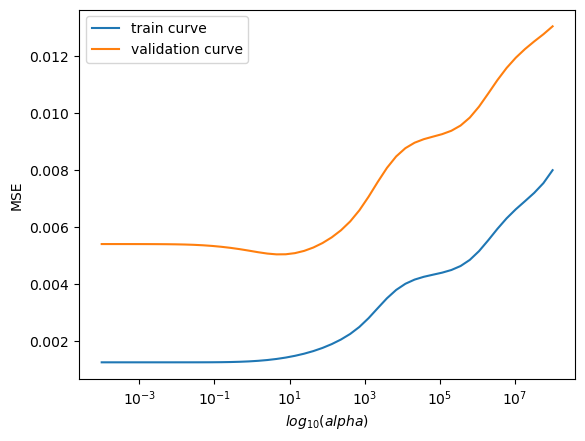

In [51]:
# Plot the validation curves
plt.semilogx(gs_results["alpha"], gs_results["train_mse"], label="train curve")
plt.semilogx(
    gs_results["alpha"], gs_results["validation_mse"], label="validation curve"
)
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

The optimal range of alpha values seems to be around 10e2 and 10e3, where we get the best validation score.

The model starts overfitting when alpha is smaller than 10e2 as the training score improves but we create a larger gap to the validation score. We have also overfitting on 10e6.

In [52]:
# Fit a model with a very strong regularization
strong_ridge = Ridge(alpha=10 ** 10)
strong_ridge.fit(X_tr, y_tr)

print("Largest coefficient: {:.1e}".format(np.max(np.abs(strong_ridge.coef_))))
print("Intercept: {:.2f}".format(strong_ridge.intercept_))

Largest coefficient: 5.3e-06
Intercept: 5.33


Since all coefficients are close to zero, the model always predicts the intercept term - 5.33 in this case. 

Let’s retrieve the alpha with the best generalization i.e. the one that minimizes the validation score.

In [53]:
# Get entry with the best validation MSE
best_result = gs_results.loc[gs_results.validation_mse.idxmin()]

mae2_ridge_c = best_result.validation_mae
# Print the details
print("Best alpha: {:.1e}".format(best_result.alpha))
print("Validation MSE: {:.4f}".format(best_result.validation_mse))
print("Validation MAE: {:,.0f}$".format(best_result.validation_mae))

Best alpha: 4.5e+00
Validation MSE: 0.0050
Validation MAE: 16,371$


As we can see, the best alpha is 4.5e with an validation MSE score of 0.005. We cannot really interpret this result, so we also retrieve the corresponding MAE score - as we can see, the predictions from this model are, on average, 16,371 dollars away from the true price.

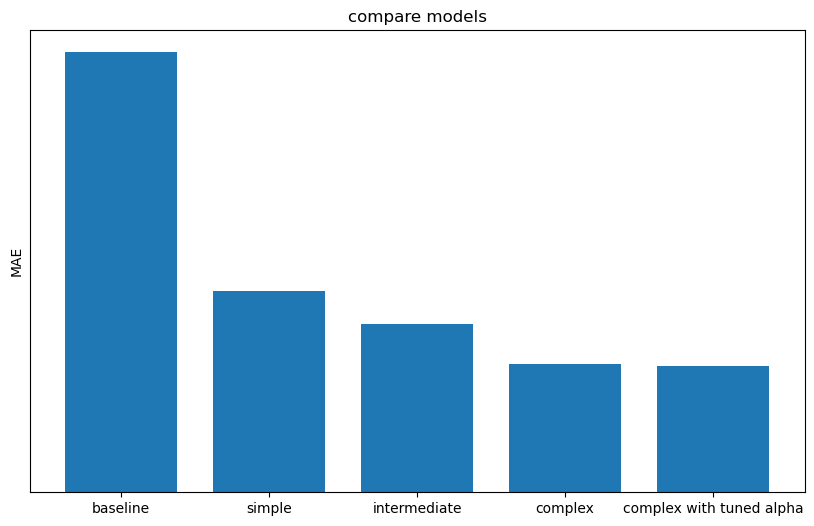

In [54]:
import matplotlib.ticker as ticker
# Final comparison
mae_values = [mae_baseline,mae_lr,mae_ridge, mae_ridge_c,mae2_ridge_c]
titles = ["baseline","simple","intermediate","complex", "complex with tuned alpha" ]

xcor = np.arange(len(mae_values))
plt.figure(figsize=(10,6))
plt.bar(xcor, mae_values,width=0.76)
#plt.autoscale(enable=True, axis='y', tight=True)
plt.xticks(xcor, titles)
plt.yticks([])
plt.title("compare models")
#plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())
#plt.yaxis.set_tick_params(labelleft=False)


plt.ylabel('MAE')
plt.show()

In [55]:
#mylist = list(df_encoded.select_dtypes(include=['object']).columns)
#mylist 

## Predicting on test data 

Now that we have our three models ready, we are going to get our test set with 500 new houses that are unseen by our model.

In [56]:
# loading the test data
df_test = pd.read_csv("house-prices-test.csv")

In [57]:
df_test.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,...,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
2,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2006,New,Partial
3,1963,535452060,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml


In [58]:
print('Test data has {} entries and {} features.'.format(df_test.shape[0], df_test.shape[1]))

Test data has 500 entries and 81 features.


In [59]:
df_test.columns = df_test.columns.str.replace(' ','')

In [60]:
df_test.shape[0]

500

In [61]:
test_clean = preprocess(df_test)

In [62]:
test_clean.shape

(500, 90)

In [63]:
#Missing values counts in each column
missing_count = (test_clean.isnull().sum() / len(df_train))*100
#Fillter to fing missing count > 0 
missing_count = missing_count[missing_count > 0]
print(missing_count.sort_values())

MasVnrArea     0.123457
LotFrontage    2.880658
dtype: float64


In [64]:
test_clean['LotFrontage'] = test_clean['LotFrontage'].fillna(abs(preprocessed_df['LotFrontage'].median()))
test_clean['MasVnrArea'] = test_clean['MasVnrArea'].fillna(abs(preprocessed_df['MasVnrArea'].mean()))

In [65]:
#Missing values counts in each column
missing_count = (test_clean.isnull().sum() / len(df_train))*100
#Fillter to fing missing count > 0 
missing_count = missing_count[missing_count > 0]
print(missing_count.sort_values())

Series([], dtype: float64)


In [66]:
df_encoded_test = pd.get_dummies(test_clean, columns = categorical_nominal)

In [67]:
df_encoded_test.shape

(500, 312)

In [68]:
df_encoded_test.head()

,PID,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,...,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,909279080,68.0,11275,2,4,2,6,7,1932,1950,...,0,0,0,0,0,0,1,0,0,0
1,907126050,65.0,9757,1,4,2,5,7,1994,1994,...,0,0,0,0,0,0,0,0,1,0
2,528144030,86.0,11065,2,4,3,8,5,2006,2006,...,0,0,0,0,0,1,0,0,0,0
3,535452060,70.0,7000,1,4,3,5,7,1960,2002,...,0,0,0,0,0,0,1,0,0,0
4,911202100,66.0,8712,1,4,2,4,7,1900,1950,...,0,0,0,0,0,0,0,0,0,1


In [69]:
test_clean.shape

(500, 90)

In [70]:
preprocessed_df.shape

(2428, 92)

In [71]:
preprocessed_df.columns.difference(test_clean.columns)

Index(['LogSalePrice', 'SalePrice'], dtype='object')

In [72]:
# Reindex df with columns from the train set
# New columns were removed and missing ones that were created are filled with 0 
test_reindexed = df_encoded_test.reindex(
    columns=df_encoded.columns, fill_value = 0)

print(test_reindexed.shape)
print(df_encoded.shape)
print(test_reindexed.isnull().sum().sum())

(500, 355)
(2428, 355)
0


In [73]:
# checking if columns are the same between train and our validation set
missing = set(df_encoded.columns) - set(test_reindexed.columns)
missing

set()

Now after building three models we are going to apply them in cvs files that we are going to save with PID

Saving predictions to cvs files in dataframes

In [74]:
test_reindexed.head()

,PID,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,...,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,909279080,68.0,11275,2,4,2,6,7,1932,1950,...,0,0,0,0,0,0,1,0,0,0
1,907126050,65.0,9757,1,4,2,5,7,1994,1994,...,0,0,0,0,0,0,0,0,1,0
2,528144030,86.0,11065,2,4,3,8,5,2006,2006,...,0,0,0,0,0,1,0,0,0,0
3,535452060,70.0,7000,1,4,3,5,7,1960,2002,...,0,0,0,0,0,0,1,0,0,0
4,911202100,66.0,8712,1,4,2,4,7,1900,1950,...,0,0,0,0,0,0,0,0,0,1


Now that we have our three models ready, we are going to the 500 new houses that are unssen by our models. They make our test data set. We are going to get attributes of these houses from test dataframe and predict their prices using each model and save them to cvs. files. 

Our cvs. files are going to contain 500 rows and 2 columns: the house PID and the oredicted price as SalePrice. 

In [75]:
df_encoded[["PID","SalePrice"]].shape

(2428, 2)

In [76]:
test_reindexed[["PID","SalePrice"]].shape

(500, 2)

In [77]:
test_reindexed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Columns: 355 entries, PID to YrSold_2010
dtypes: float64(12), int64(82), uint8(261)
memory usage: 498.5 KB


In [78]:
test_reindexed.isnull().sum()[test_reindexed.isnull().sum()>0]

Series([], dtype: int64)

In [79]:
test_reindexed.columns

Index(['PID', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add',
       ...
       'MoSold_5', 'MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9',
       'YrSold_2006', 'YrSold_2007', 'YrSold_2008', 'YrSold_2009',
       'YrSold_2010'],
      dtype='object', length=355)

In [80]:
PID = test_reindexed.PID

In [81]:
PID

0      909279080
1      907126050
2      528144030
3      535452060
4      911202100
         ...    
495    905378040
496    533252020
497    527127100
498    906340120
499    902427180
Name: PID, Length: 500, dtype: int64

### Simple model 

In [82]:
# creating X
# Select features
features = ['OverallQual','GrLivArea',]
X_s = test_reindexed[features].values
X_s.shape

(500, 2)

In [83]:
# Convert predictions to dollars
predictions_s = 10**lr_simple1.predict(X_s)
#predictions_s = 10**regressor.predict(X_s)


In [84]:
data_s = {'PID': PID, 'SalePrice': predictions_s}
predictions1 = pd.DataFrame.from_dict(data_s)
predictions1.head()

,PID,SalePrice
0,909279080,190703.616434
1,907126050,118640.277874
2,528144030,269309.316017
3,535452060,123853.244839
4,911202100,105270.273405


In [85]:
predictions1.to_csv('predictions-simple-model.csv', index=False, float_format='%.2f')

### Intermediate model

In [86]:
features = ['TotalBsmtSF', 'FullBath','HalfBath','KitchenQual','Functional','PavedDrive','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'OverallQual','GrLivArea','LotFrontage', 
            'LotArea','LotShape', 'Utilities', 'LandSlope', 'Utilities']


In [87]:
# creating X
# Select features
#features = test_reindexed.sample(n=10,axis='columns',replace=False)
X_i = test_reindexed[features].values
X_i.shape

(500, 21)

In [88]:
X_i.shape

(500, 21)

In [89]:
predictions_i = 10**ridge_inter.predict(X_i)

In [90]:
data_i = {'PID': PID, 'SalePrice': predictions_i}
predictions2 = pd.DataFrame.from_dict(data_i)
predictions2.head()

,PID,SalePrice
0,909279080,180698.532037
1,907126050,130004.408442
2,528144030,284530.621259
3,535452060,124421.045059
4,911202100,97872.699836


In [91]:
predictions2.to_csv('predictions-intermediate-model.csv', index=False, float_format='%.2f')

### Model with all the features

In [92]:
test_reindexed.shape

(500, 355)

In [93]:
# creating X
columns_to_exclude = ['SalePrice','LogSalePrice']
features_c = test_reindexed.drop(columns_to_exclude, axis = 1).columns
X_c = test_reindexed[features_c].values
X_c.shape

(500, 353)

Convert predictions to dollars

In [94]:
predictions_c = 10**ridge_c.predict(X_c)

In [95]:
data_c = {'PID': PID, 'SalePrice': predictions_c}
predictions3 = pd.DataFrame.from_dict(data_c)
predictions3.head()

,PID,SalePrice
0,909279080,192532.801928
1,907126050,157075.837547
2,528144030,290824.294255
3,535452060,129790.595420
4,911202100,78307.100622


In [96]:
predictions3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PID        500 non-null    int64  
 1   SalePrice  500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB


In [97]:
# Distribution of the predicted prices
predictions3.SalePrice.describe()

count    5.000000e+02
mean     1.857872e+05
std      9.141692e+04
min      4.017402e+04
25%      1.306903e+05
50%      1.628667e+05
75%      2.134587e+05
max      1.017599e+06
Name: SalePrice, dtype: float64

In [98]:
# Distribution of the prices in house-prices.csv
df_train.SalePrice.describe()

count      2430.000000
mean     180199.692593
std       79607.467171
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      213099.750000
max      755000.000000
Name: SalePrice, dtype: float64

In [99]:
predictions3.to_csv('predictions-complex-model.csv', index=False, float_format='%.2f')